Baseball Case Study

Table of Contents
1. Overview
2. Importing Libraries & Data
3. Exploratory Data Analysis
4. Data Preprocessing 
5. Model Development
   5.1  Testing Candidate models
   5.2  Hyperparameter tuning and Performance of model 
   5.3  Saving model 
   5.4  Predicting the Final Model
6. Conclusion
7. Reference

1. Overview

Project Description:-

This dataset utilizes data from 2014 Major League Baseball seasons in order to develop an algorithm that predicts the number of wins for a given team in the 2015 season based on several different indicators of success. There are 16 different features that will be used as the inputs to the machine learning and the output will be a value that represents the number of wins.

Dataset contain 16 feature columns and one labeled columns Output.
Input features: R, AB, H, 2B, 3B, HR, BB, SO, SB, RA, ER, ERA, CG, SHO, SV, E
Output column: W

Dataset Link-
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/baseball.csv

2.Importing Libraries & Data

In [1]:
# Importing neccessary librarys
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings 
warnings.filterwarnings('ignore')

In [26]:
# Load data set through pandas library
df= pd.read_csv(r"C:\Users\ganes\Downloads\Data-Science-ML-Capstone-Projects-master\baseball.csv")
df.head(10)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


3.Exploratory Data Analyses

Statistics of Dataset

In [3]:
# Data type of columns 
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

In [4]:
# For checking dataset diemensions 
df.shape 

(30, 17)

In [5]:
# Available columns in dataset 
df.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

Descriptive statistics

In [6]:
# Summarizing the distribution of the numerical variables.
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


Above statistics shows that data is across all attributes is not in same range, so we will have to normalize the data first.
The features are not on the same scale.CG has a mean of 3.466 while AB has a mean value of 5516.266. 

Scaling can help with the convergence of gradient-based optimization algorithms and improve training stability.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [8]:
# For checking unique value in label column 
df['W'].nunique()
# Here we can see that number of unique values are more in number of raw. So This is regression problem.

24

Data Visualization

1. Using Univariate Plots

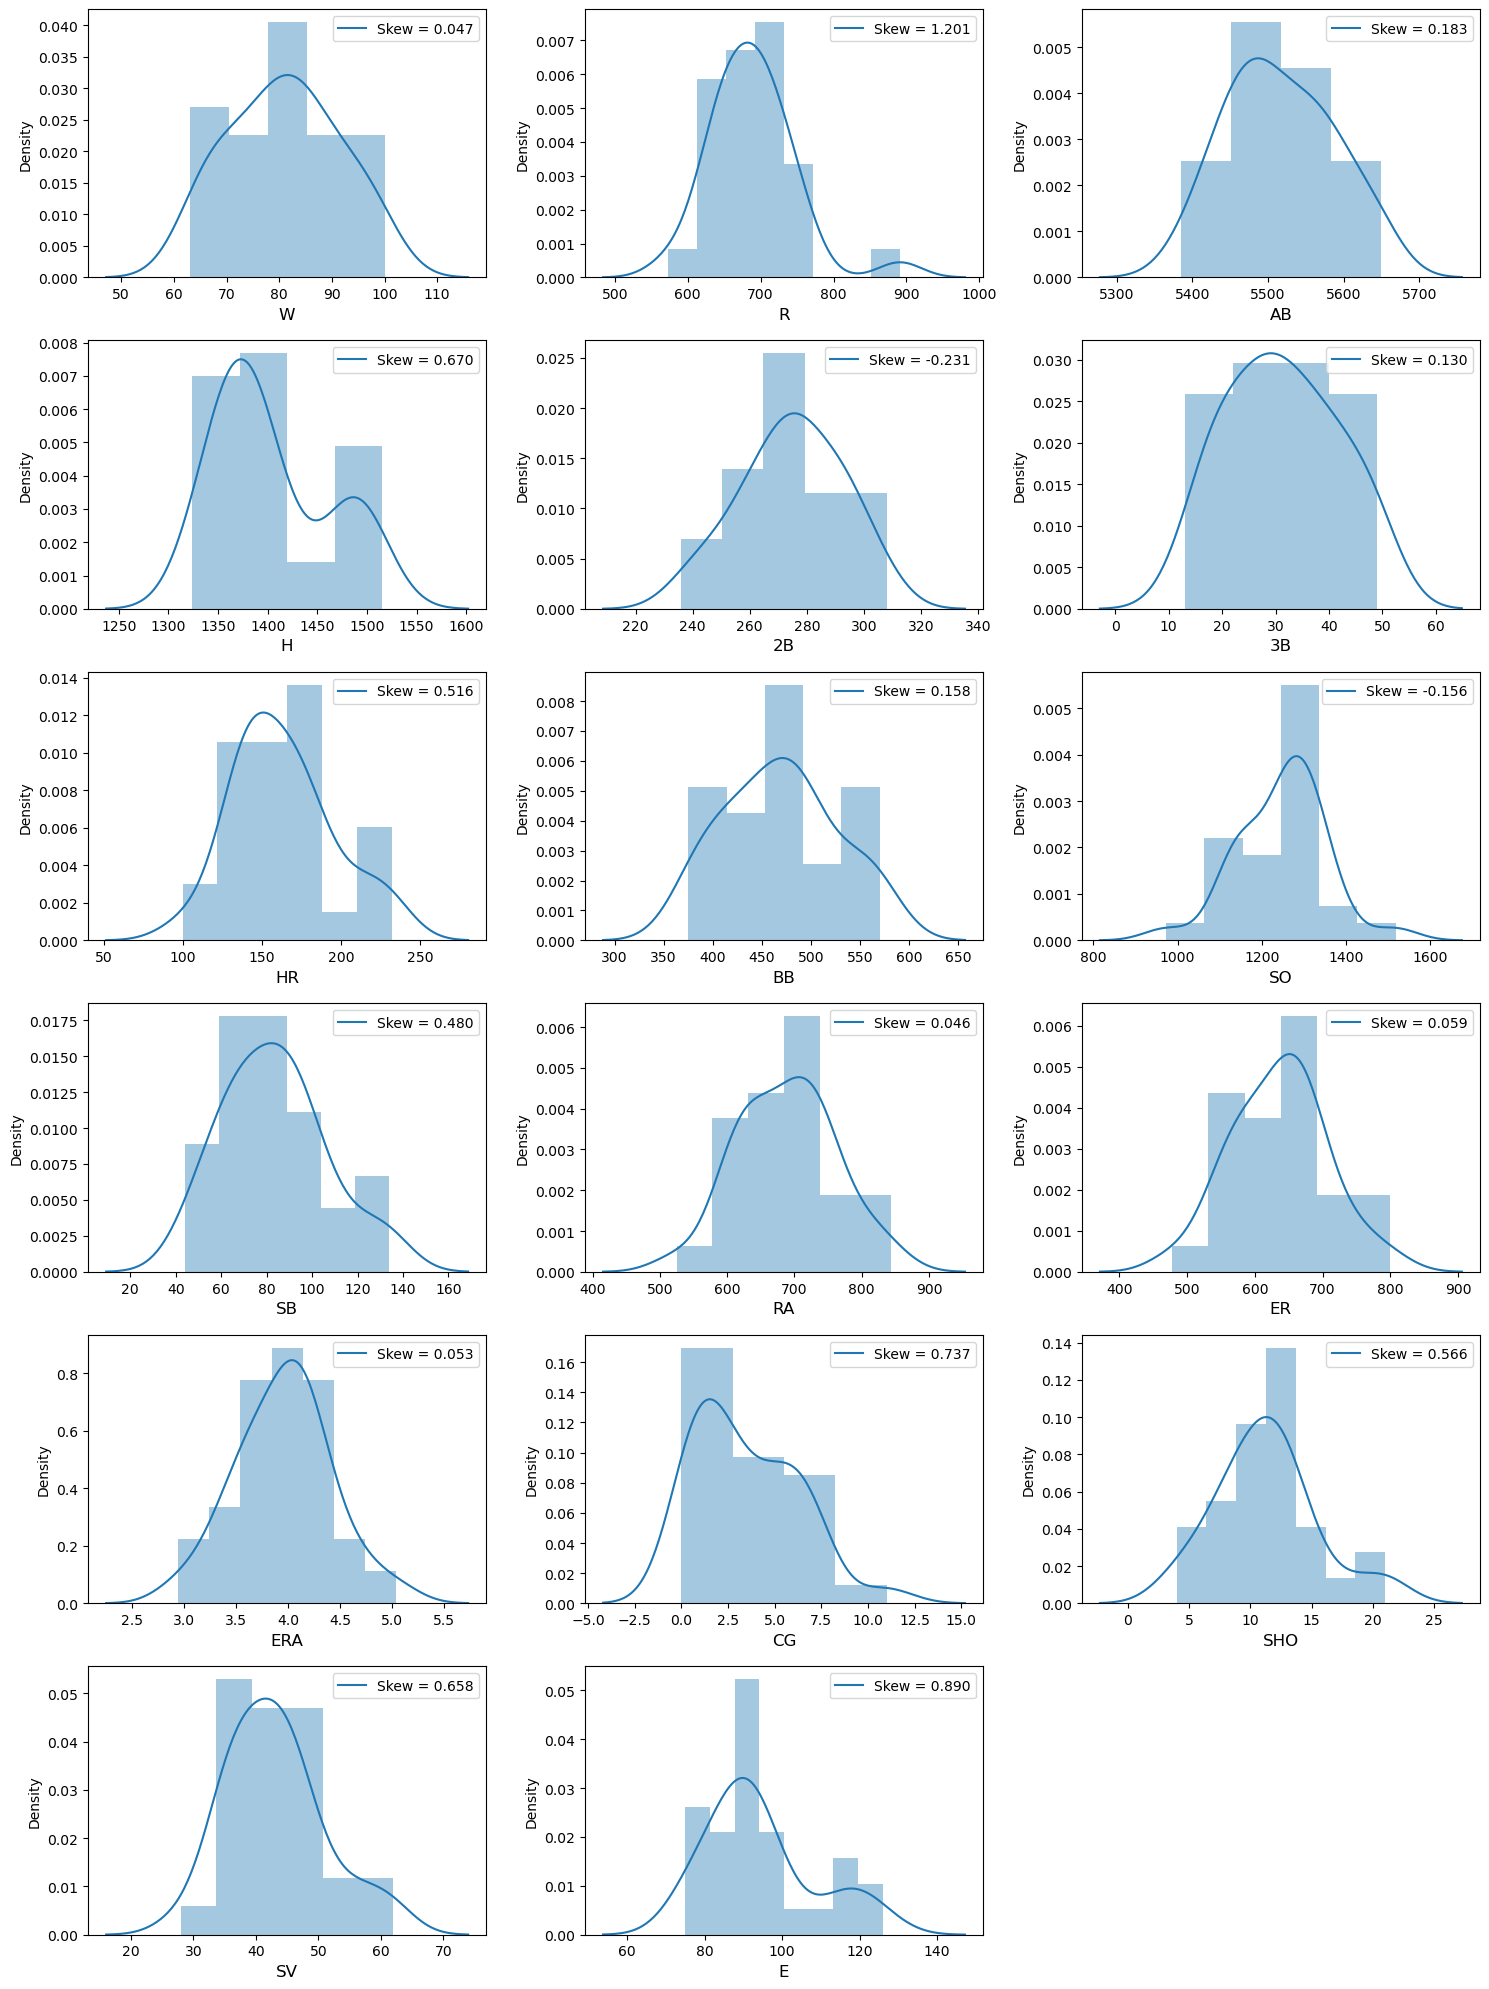

In [9]:
plt.figure(figsize=(15, 20), facecolor='white')  
plotnumber = 1

for column in df:
    if plotnumber <= 17:
        ax = plt.subplot(6, 3, plotnumber)  
        skew = df[column].skew()
        sns.distplot(df[column], ax=ax)
        plt.xlabel(column, fontsize=12)
        plt.legend([f'Skew = {skew:.3f}'], fontsize=10)  # Adding skewness value as a legend
    plotnumber += 1


plt.tight_layout()
plt.show()


from above visualization we can see . Skewness of 'R' column is highly skewed (1.201). Whlie remaining columns have moderately skewed .

2.Using Multivariate Plots

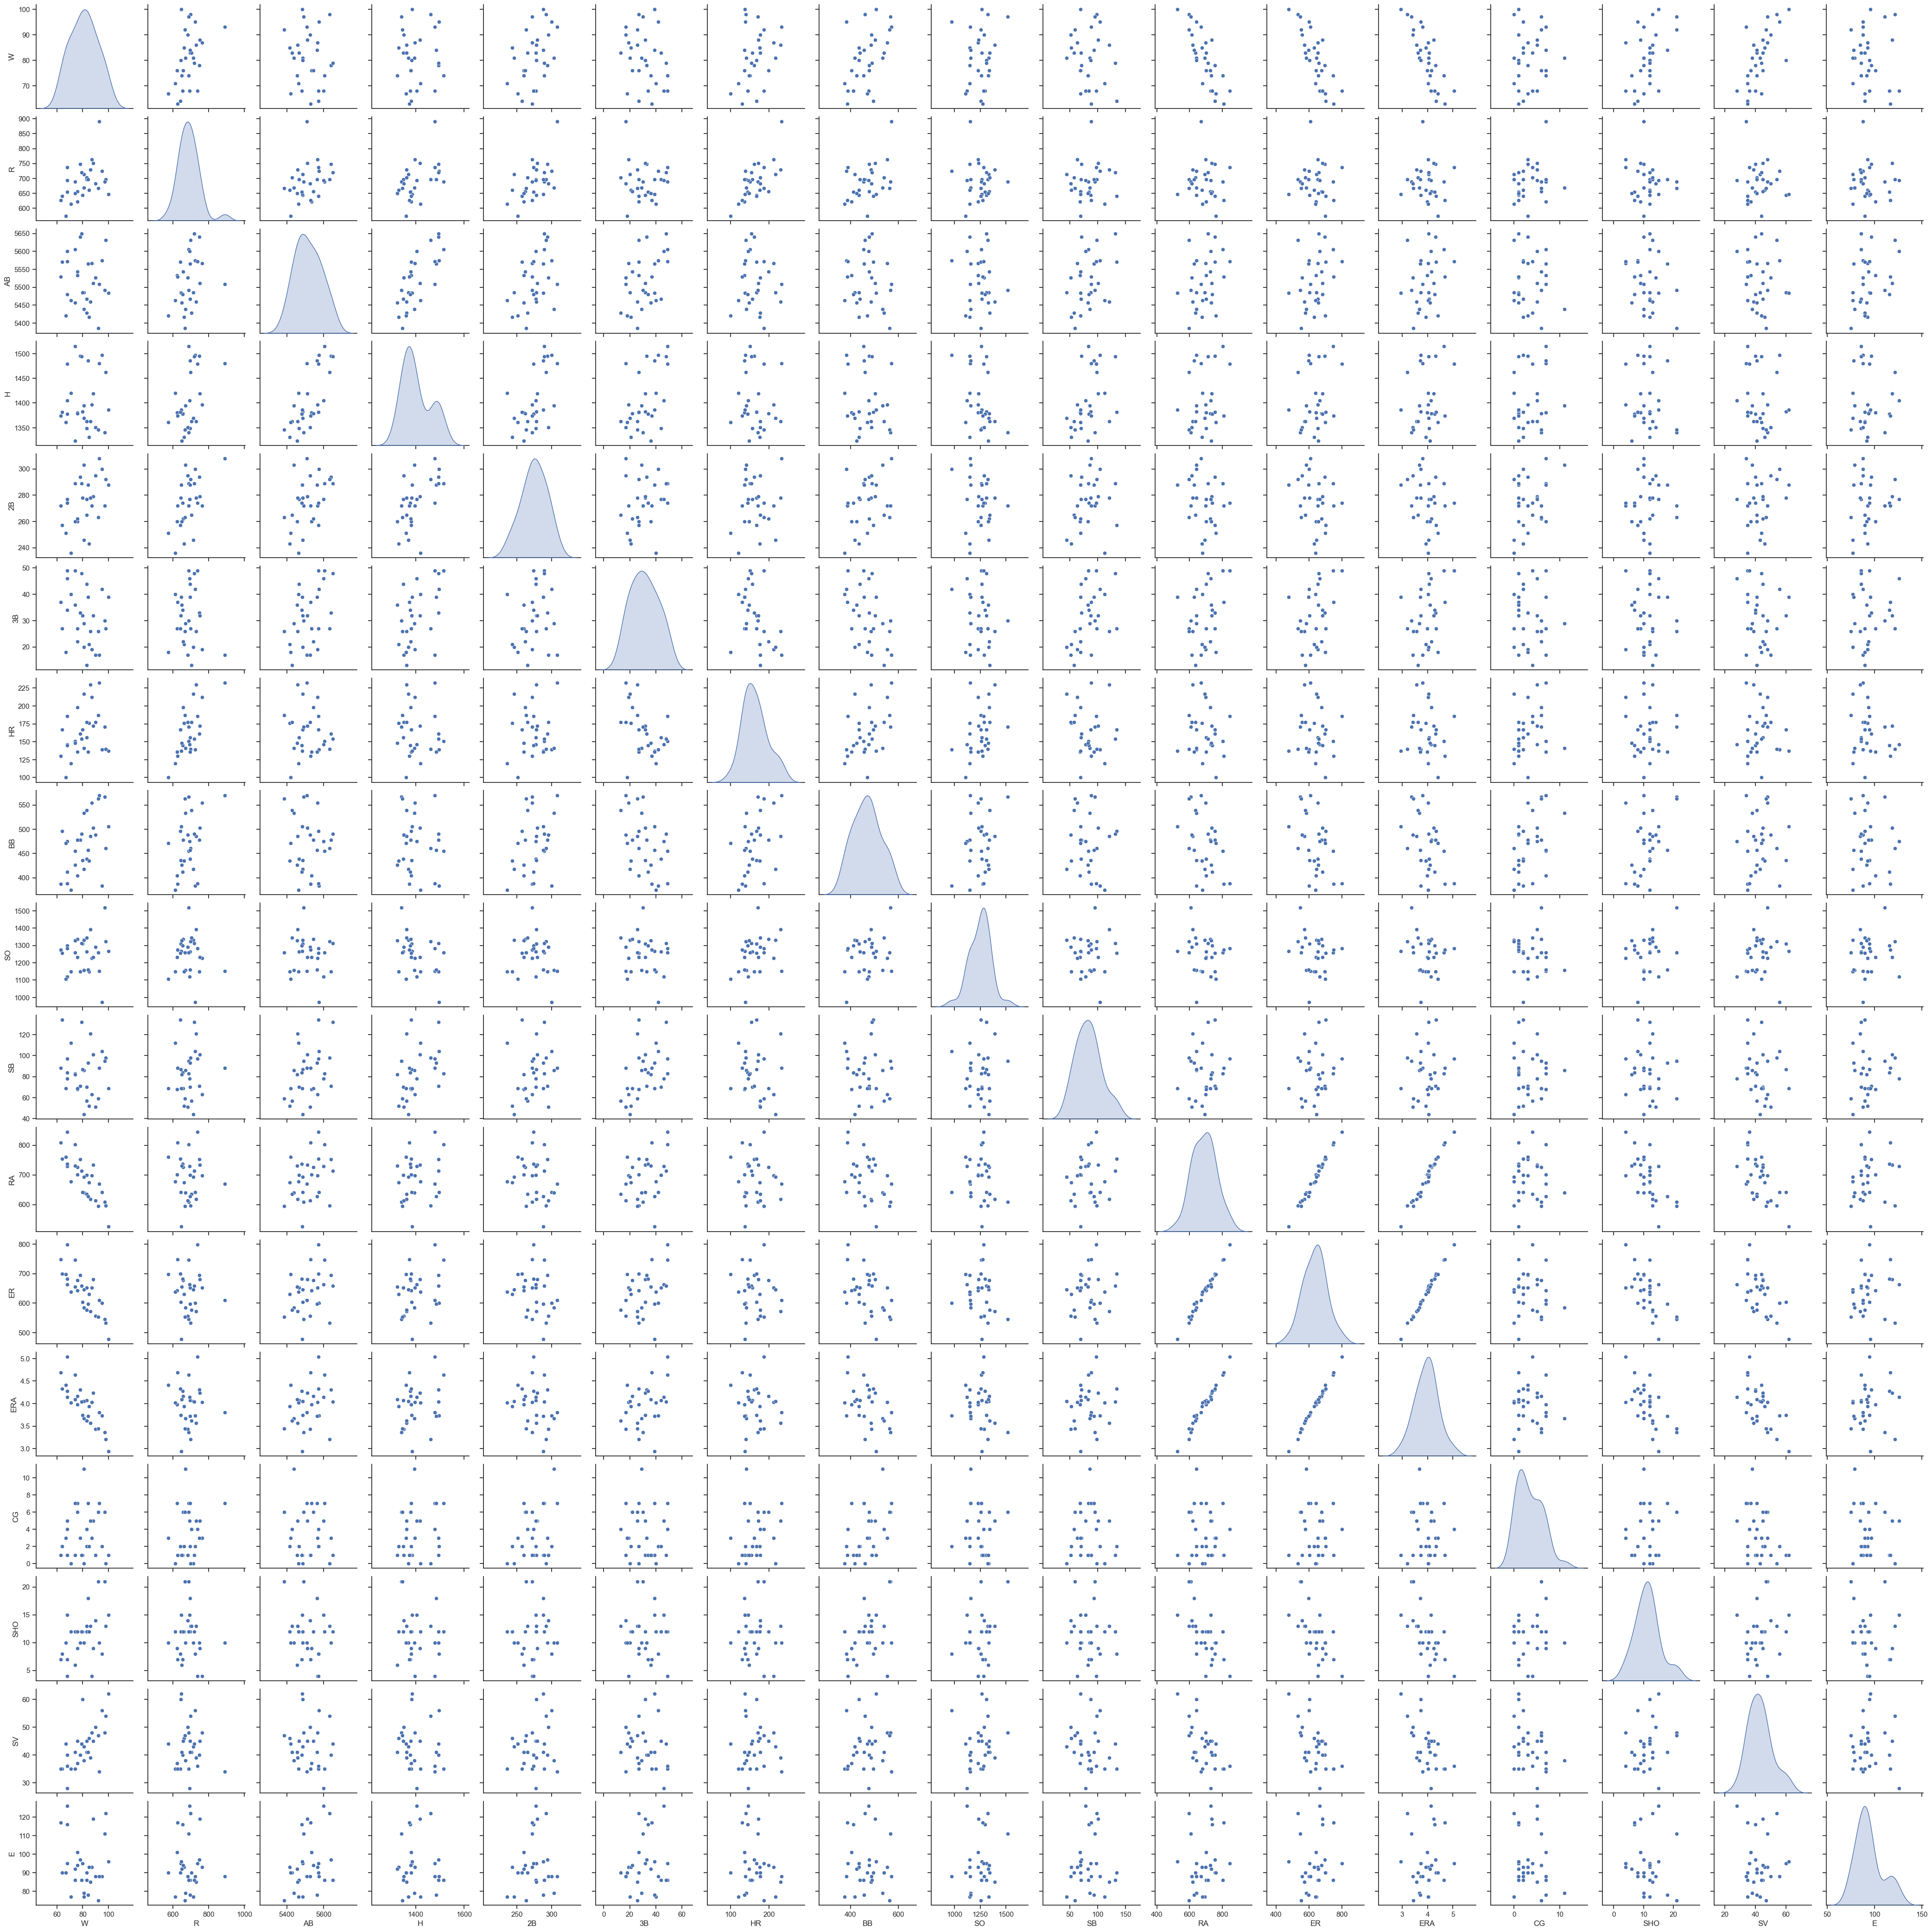

In [12]:
# Pairplot for pairwise relationships between numeric features
sns.pairplot(df , diag_kind='kde')
plt.show()

<Figure size 1200x800 with 0 Axes>

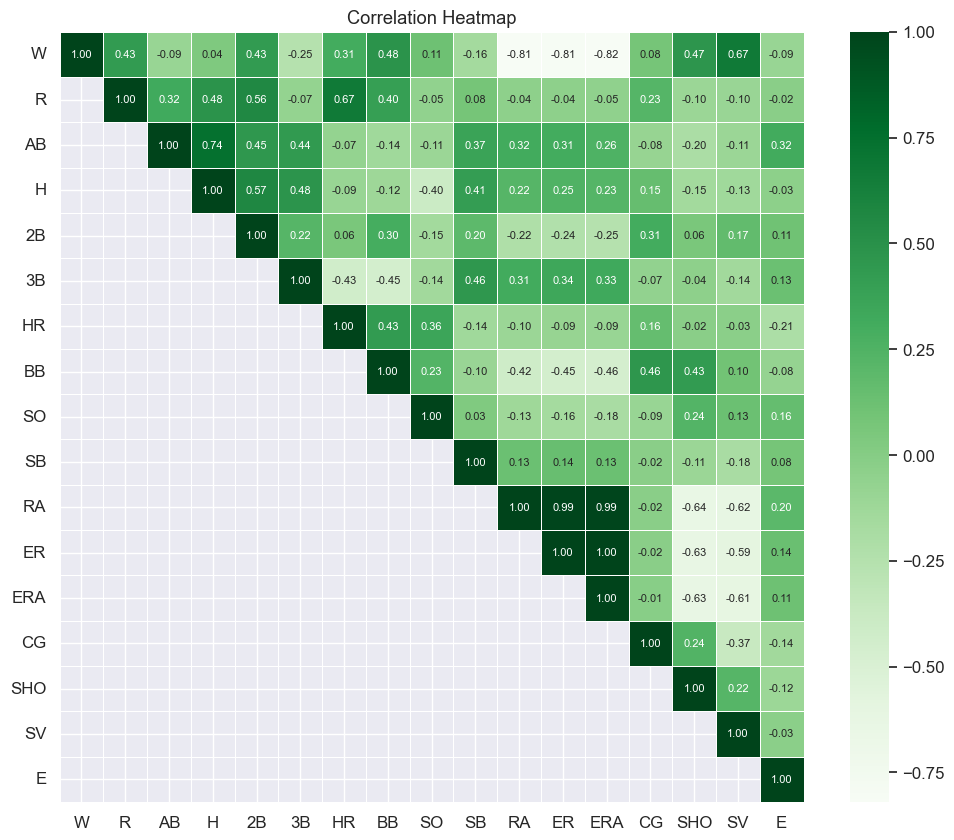

In [26]:
# Heatmap to visualize correlations between features
correlation_matrix = df.corr()

plt.figure(figsize=(12, 8))
plt.figure(figsize=(12, 10))
sns.set(font_scale=1.1)

# Create a mask to hide the lower triangle of the heatmap
mask = np.tri(*correlation_matrix.shape, k=-1, dtype=bool)

sns.heatmap(correlation_matrix, annot=True, cmap='Greens', linewidths=0.5,fmt=".2f", annot_kws={"size": 8}, mask=mask)

plt.yticks(rotation=0)   # Keep y-axis labels horizontal
plt.title('Correlation Heatmap')
plt.show()

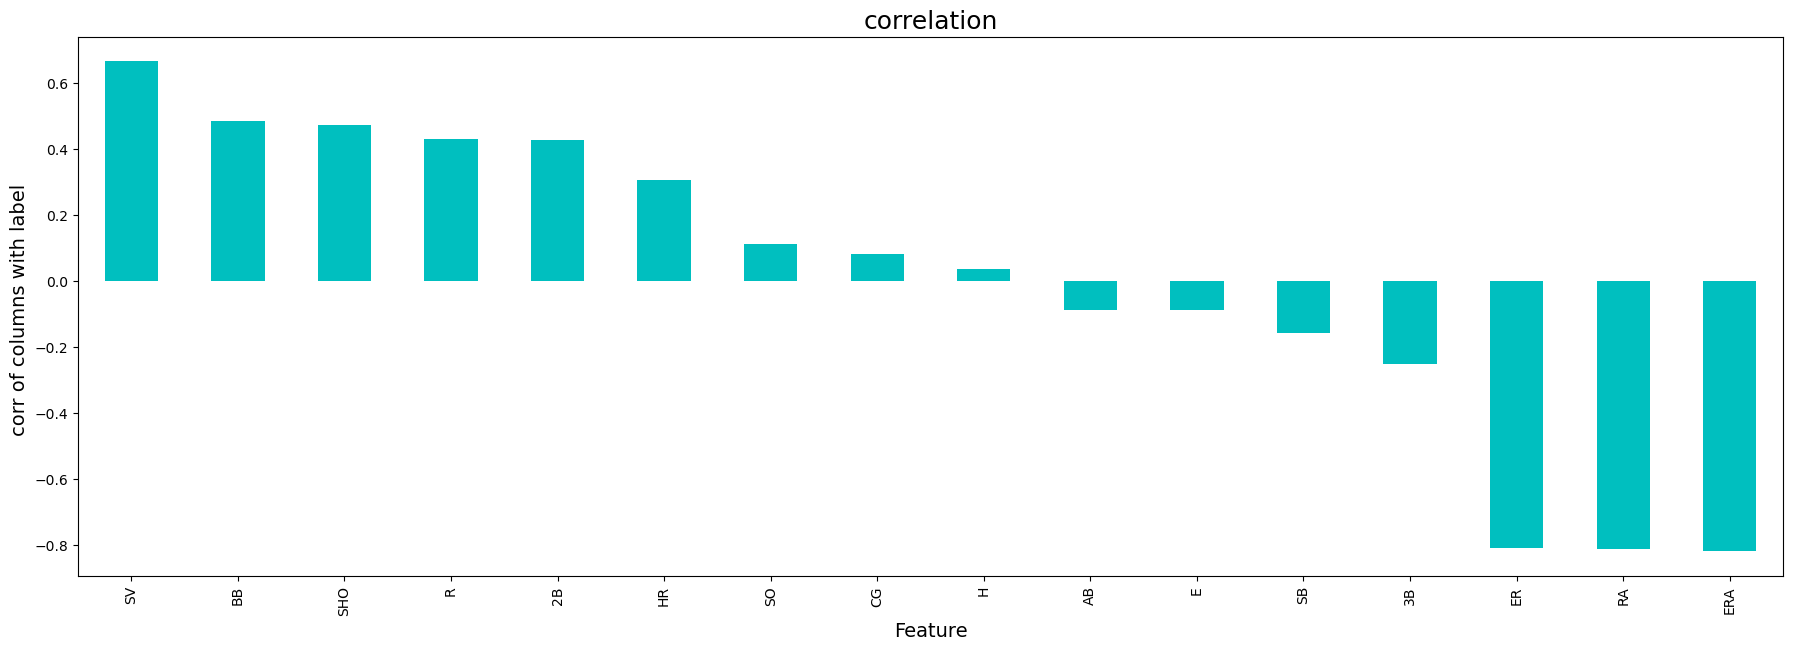

In [27]:
plt.figure(figsize=(22,7))
df.corr()['W'].sort_values(ascending=False).drop(['W']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('corr of columns with label ',fontsize=14)
plt.title('correlation',fontsize=18)
plt.show()

In [34]:
list_columns=df.columns.tolist()
columns_to_process=list_columns[1:]

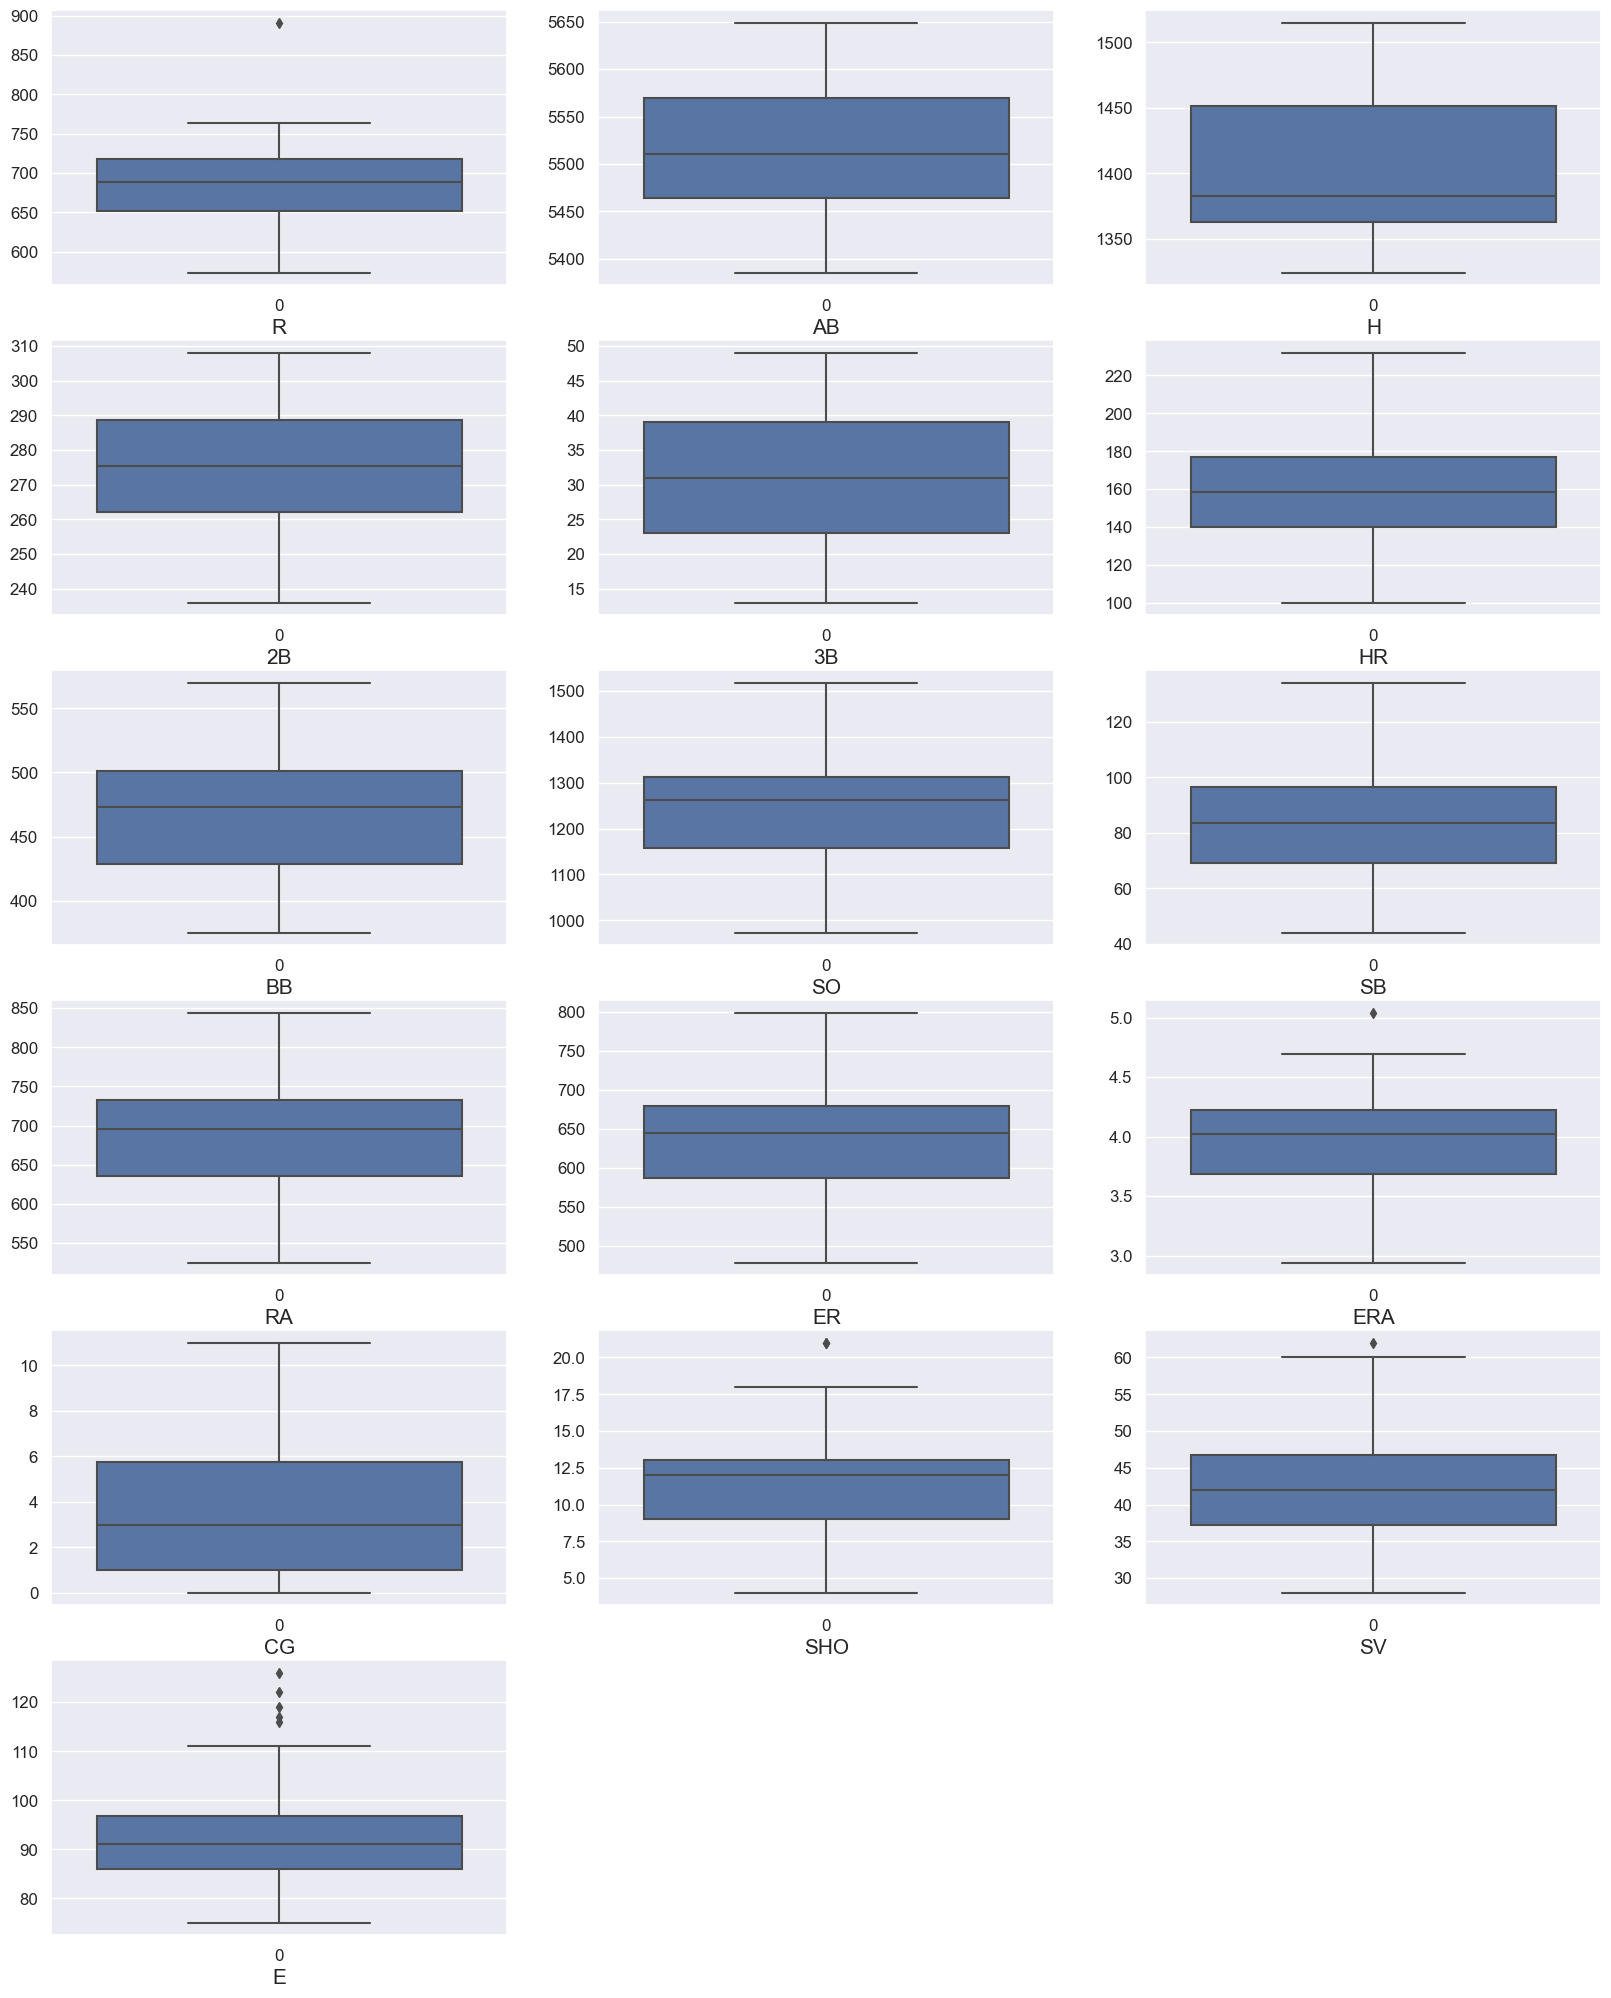

In [35]:
# Boxplots to visualize the distribution of numeric feature
plt.figure(figsize =(20,25))
graph = 1

for column in columns_to_process:
    plt.subplot(6,3,graph)
    ax=sns.boxplot(data=df[column])
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

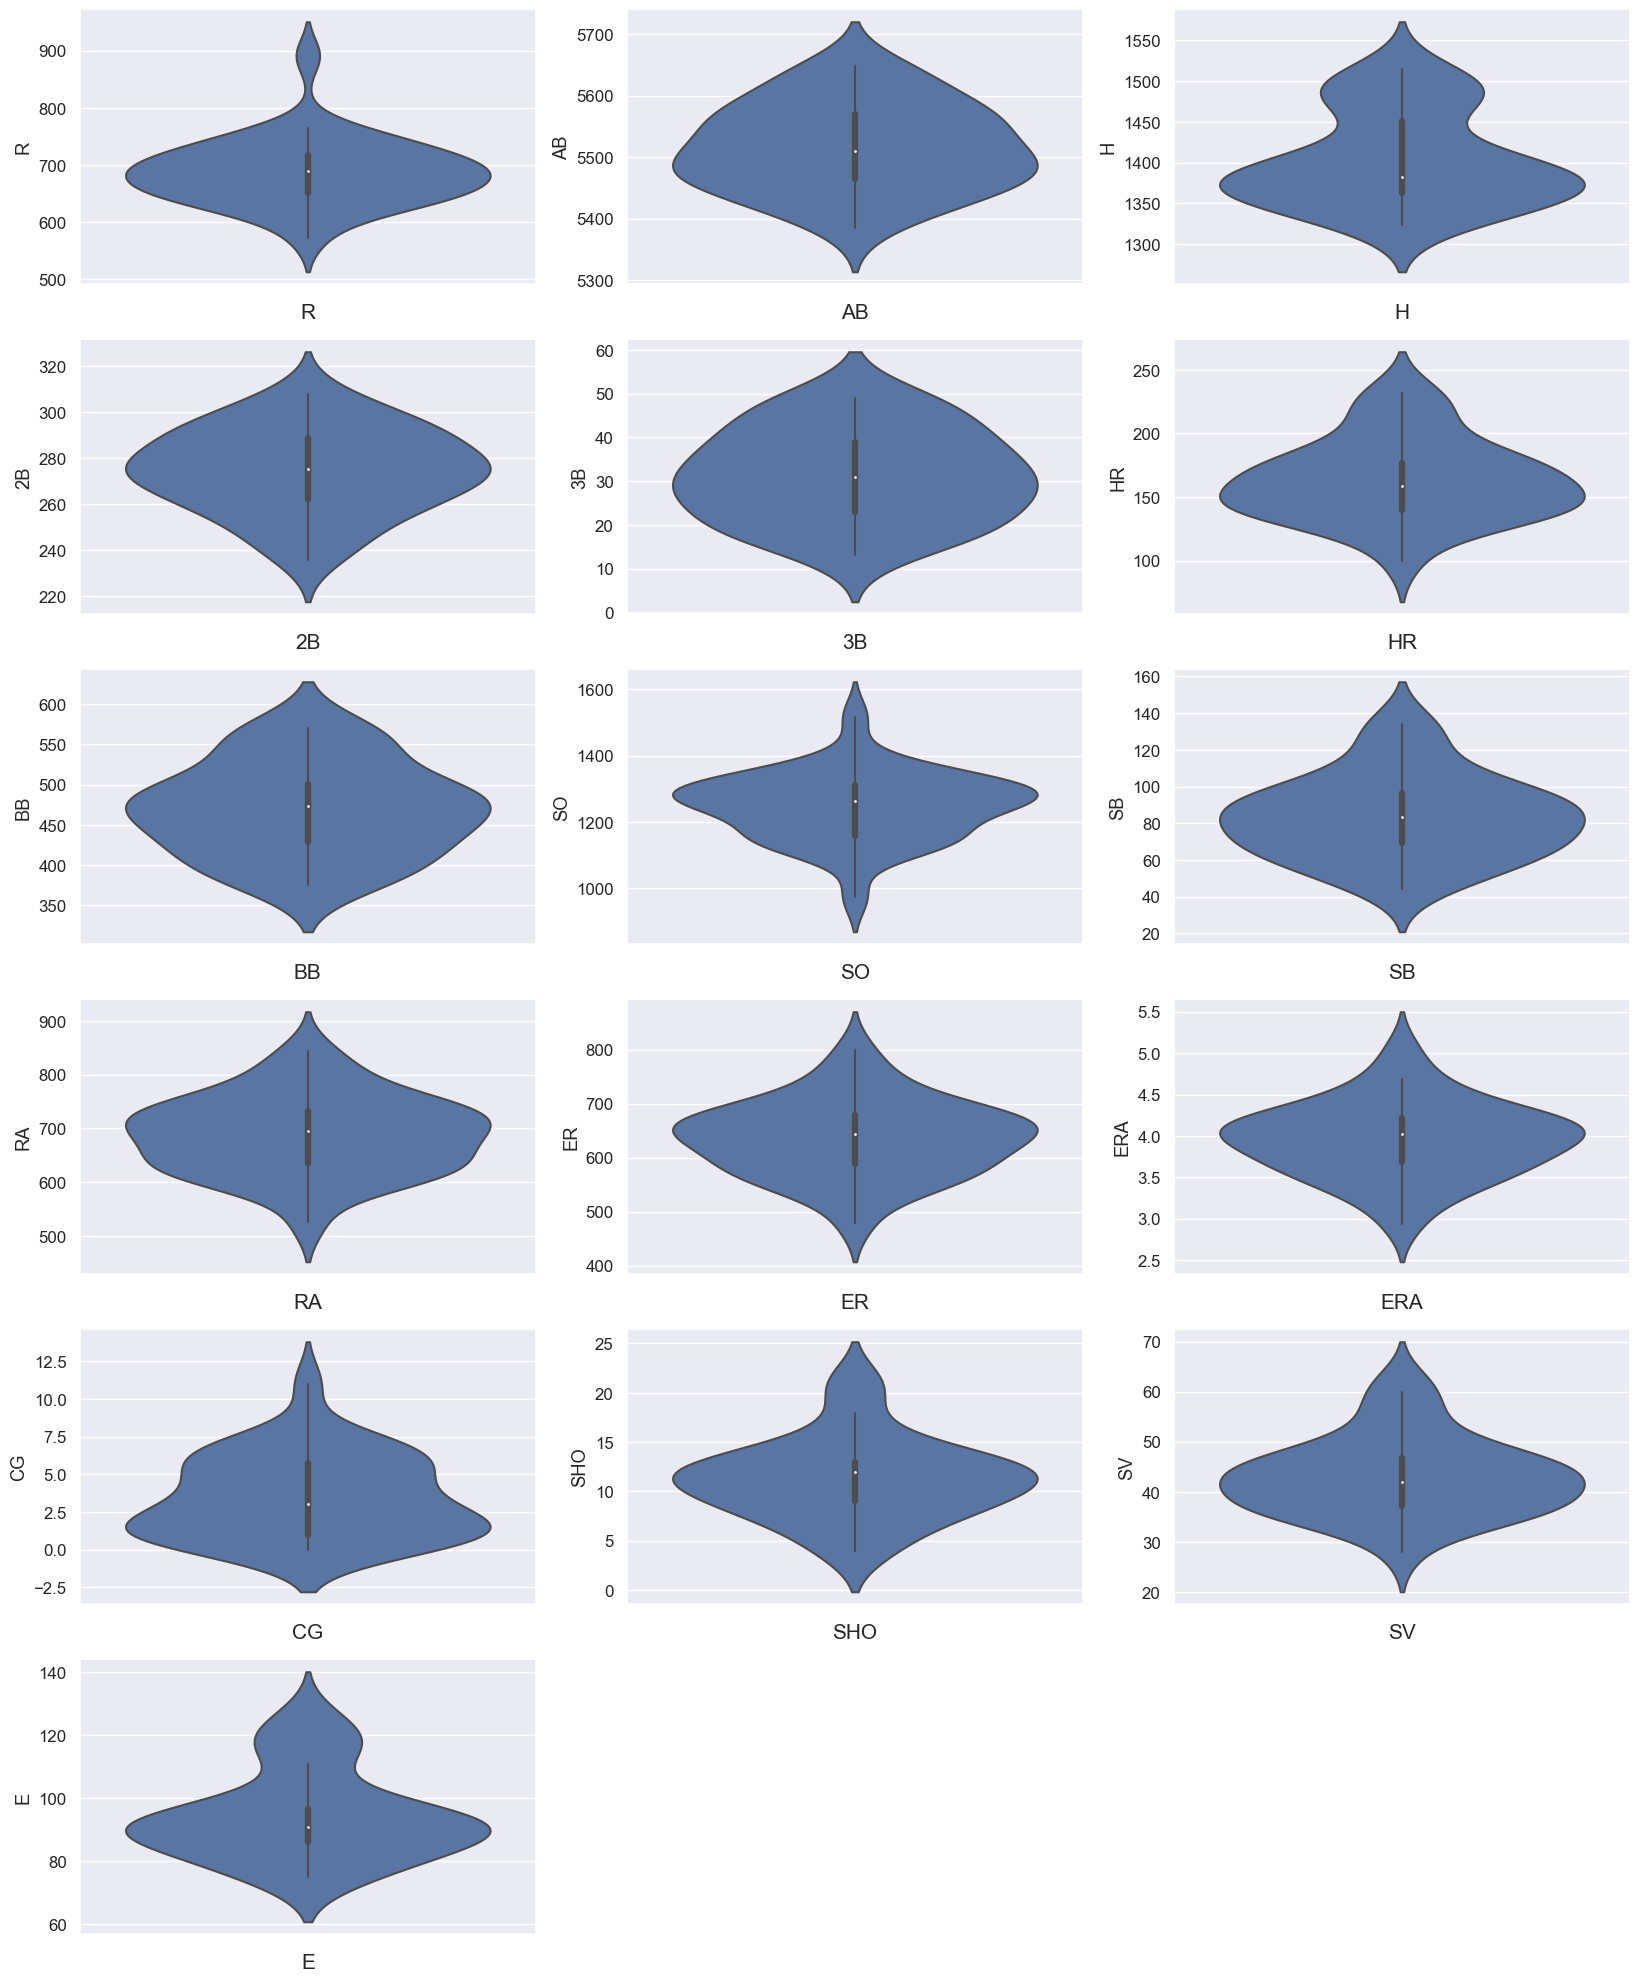

In [38]:
plt.figure(figsize =(20,25))
graph = 1

for column in columns_to_process:
    plt.subplot(6,3,graph)
    ax=sns.violinplot(data=df, y=column)
    plt.xlabel(column,fontsize = 15)
    graph +=1
plt.show()

4.Data Preprocessing

checking for null value in dataset nan,none

In [39]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


Outlier removal

In [43]:
def remove_outliers_iqr(data, col_name, lower_factor=1.5, upper_factor=1.5):
    q1 = data[col_name].quantile(0.25)
    q3 = data[col_name].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - lower_factor * iqr
    upper_bound = q3 + upper_factor * iqr
    return data[(data[col_name] >= lower_bound) & (data[col_name] <= upper_bound)]

# Apply function to each column
columns_to_process 
for col in columns_to_process:
    df = remove_outliers_iqr(df, col)

# Print cleaned DataFrame
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93


In [44]:
df.shape

(18, 17)

As we can see that around 50% of data is remove in outlier removal.So due to less mount of data. We does not remove outlier for shake of uniqueness of data is also important.

In [71]:
# Again load the dataset
df= pd.read_csv(r"C:\Users\ganes\Downloads\Data-Science-ML-Capstone-Projects-master\baseball.csv")
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


skewness removal

In [72]:
# Calculate the skewness of each column
skewness = df.skew()
print("Skewness of Columns:")
print(skewness)

Skewness of Columns:
W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64


In [73]:
# Define a threshold for skewness (e.g., 0.5) above which you consider a column as skewed
skew_threshold = 0.5

skewed_columns = skewness[abs(skewness) > skew_threshold].index.tolist()

# Apply skewness correction to the skewed columns using a transformation like the Box-Cox method
for col in skewed_columns:
    # Check for negative values (Box-Cox requires all values to be positive)
    if (df[col] > 0).all():
        df[col] = np.log1p(df[col])  # Log transformation
    else:
        df[col] = df[col] ** 0.5  # Square root transformation

Normalization of data 

In [74]:
# Define our independent variables (features) and the dependent variable (output)
x = df.drop(columns=["W"])  # Independent variables
Y = df["W"]  # Dependent variable

In [75]:
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X = Scaler.fit_transform(x)

5.Model Development

finding random state parameter for model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LinearRegression
maxr2=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=i)
    LR = LinearRegression()
    LR.fit(x_train,y_train)
    pred= LR.predict(x_test)
    r2_scor= r2_score(y_test,pred)
    if r2_scor>maxr2:
        maxr2=r2_scor
        maxrs=i
print('Best accuracy is',maxr2 ,'at random state ',maxrs )

Best accuracy is 0.9352270783750579 at random state  39


In [77]:
maxaccu=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20, random_state=i)
    RFR = RandomForestRegressor()
    RFR.fit(x_train,y_train)
    pred= RFR.predict(x_test)
    r2_scor= r2_score(y_test,pred)
    if r2_scor>maxaccu:
        maxaccu=r2_scor
        maxrs=i
print('Best accuracy is',maxaccu ,'at random state ',maxrs )

Best accuracy is 0.8729849602989258 at random state  93


In [ ]:
5.1 Testing Candidate models

Appling another algorithms

In [60]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge, Lasso
import matplotlib.pyplot as plt

Model: Linear Regression
Mean Squared Error: 24.651610150607357
R-squared (R2): 0.5700300555126623
Model: Ridge Regression
Mean Squared Error: 16.885051464006313
R-squared (R2): 0.7054932884184946
Model: Lasso Regression
Mean Squared Error: 13.15901492707687
R-squared (R2): 0.7704822977835429
Model: Random Forest Regressor
Mean Squared Error: 19.060899999999986
R-squared (R2): 0.6675424418604654
Model: SVR
Mean Squared Error: 12.17662881117648
R-squared (R2): 0.7876169393399451
Best Model: SVR with R-squared (R2) score of 0.7876169393399451


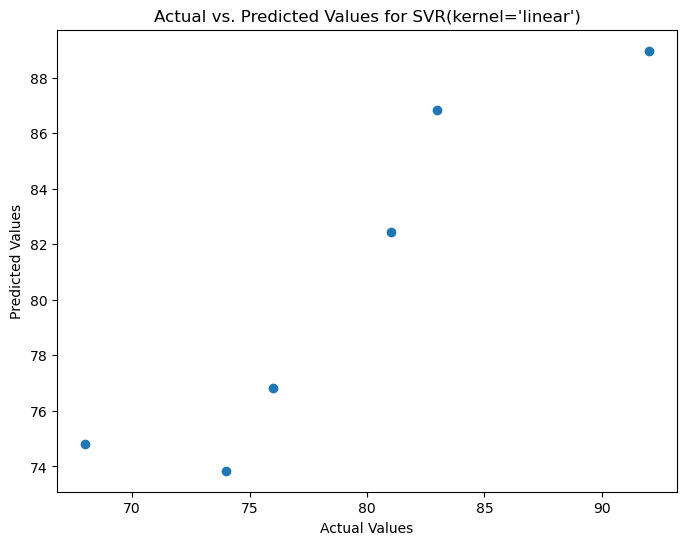

In [85]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=112)

# A list of regression models to evaluate for regression
models = [
    ('Linear Regression', LinearRegression()),
    ('Ridge Regression', Ridge(alpha=1.0)),
    ('Lasso Regression', Lasso(alpha=1.0)),
    ('Random Forest Regressor', RandomForestRegressor(n_estimators=100, random_state=93)),
    ('SVR', SVR(kernel='linear'))  
]

# Initialize variables to keep track of the best model and its performance
best_model = None
best_score = -np.inf

# Iterate through the models, fit them, and evaluate their performance
for model_name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics (you can add more if needed)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f'Model: {model_name}')
    print(f'Mean Squared Error: {mse}')
    print(f'R-squared (R2): {r2}')
    
    # Check if this model has the best performance so far
    if r2 > best_score:
        best_score = r2
        best_model = model_name

# Print the best model
print(f'Best Model: {best_model} with R-squared (R2) score of {best_score}')

# We can visualize the actual vs. predicted values for the best model
best_model_index = [model[0] for model in models].index(best_model)
best_model = models[best_model_index][1]
y_pred_best = best_model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title(f"Actual vs. Predicted Values for {best_model}")
plt.show()

5.2 Hyperparameter tuning and Performance of model 

In [87]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import r2_score

# Step 1: Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=39)

# Step 2: Define the hyperparameter grid to search
param_grid = {
    'C': [0.1, 1, 10],           # Regularization parameter
    'epsilon': [0.01, 0.1, 1],   # Epsilon parameter for epsilon-insensitive loss
}

# Step 3: Create the SVR model with a linear kernel
svr_model = SVR(kernel='linear')

# Step 4: Initialize GridSearchCV with the model and hyperparameter grid
grid_search = GridSearchCV(svr_model, param_grid, cv=5, scoring='r2')

# Step 5: Fit the model and perform hyperparameter tuning
grid_search.fit(X_train, y_train)

# Step 6: Get the best hyperparameters
best_params = grid_search.best_params_

# Step 7: Use the best hyperparameters to create the final model
best_svr_model = SVR(kernel='linear', **best_params)

# Step 8: Train the final model on the entire training dataset
best_svr_model.fit(X_train, y_train)

# Step 9: Make predictions on the test set
y_pred = best_svr_model.predict(X_test)

# Step 10: Evaluate the model's performance on the test set
r_squared = r2_score(y_test, y_pred)

# Print the best hyperparameters and performance metrics
print("Best Hyperparameters:", best_params)
print("R-squared:", r_squared)


Best Hyperparameters: {'C': 1, 'epsilon': 1}
R-squared: 0.8288961689065923


Cross Validation 

In [89]:
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import r2_score
import numpy as np

# Create the SVR model with a linear kernel
svr_model = SVR(kernel='linear')

# Perform k-fold cross-validation (e.g., k=5)
k = 5
cross_val_scores = cross_val_score(svr_model, X, Y, cv=k, scoring='r2')

# Print the R-squared scores for each fold
print("Cross-Validation R-squared Scores:", cross_val_scores)

# Compute the mean and standard deviation of the R-squared scores
mean_r2 = np.mean(cross_val_scores)
std_r2 = np.std(cross_val_scores)
print("Mean R-squared:", mean_r2)
print("Standard Deviation of R-squared:", std_r2)

# Optionally, you can perform cross-validated predictions
cross_val_predictions = cross_val_predict(svr_model, X, Y, cv=k)

# Evaluate the cross-validated predictions using R-squared
overall_r2 = r2_score(Y, cross_val_predictions)
print("Overall R-squared (Cross-Validated):", overall_r2)


Cross-Validation R-squared Scores: [ 0.78777385 -0.53201747  0.62984205  0.75737804  0.85134624]
Mean R-squared: 0.4988645428433445
Standard Deviation of R-squared: 0.5204640208455433
Overall R-squared (Cross-Validated): 0.7633308102378884


5.3 Saving model

In [94]:
import joblib
joblib.dump(best_svr_model,'Baseball Case Study Project.pkl')

['Baseball Case Study Project.pkl']

5.4 Predicting the Final Model

In [95]:
actual_win= Y
y_pred_all= best_svr_model.predict(X)
# Convert the predicted values to integers
predicted_win = y_pred_all.astype(int)

# Create a DataFrame to display the results
result_df = pd.DataFrame({
    'Actual Win': actual_win,
    'Predicted Win': predicted_win
})

print(result_df)

    Actual Win  Predicted Win
0           95             93
1           83             81
2           81             82
3           76             74
4           74             70
5           93             88
6           87             85
7           81             82
8           80             89
9           78             79
10          88             80
11          86             85
12          85             82
13          76             77
14          68             70
15         100            101
16          98             93
17          97             88
18          68             74
19          64             65
20          90             90
21          83             85
22          71             71
23          67             68
24          63             63
25          92             89
26          84             85
27          79             79
28          74             75
29          68             68


6.Conclusion:-

The model used for prediction is a Support Vector Regression (SVR) model with a linear kernel. This model was trained on data from the 2014 MLB season, using various features related to team performance as input.
Key Findings:

Performance Metric: The model's performance was evaluated using the R-squared (R2) metric, which measures the proportion of the variance in the target variable (number of wins) that can be explained by the model. The model achieved a cross-validated R2 score of approximately 0.7633, indicating that it captures a significant portion of the variation in team wins.

Strengths:
The model appears to provide a reasonable estimation of team performance based on the given features.
The R2 score of 0.7633 suggests that the model explains a substantial part of the variance in the number of wins.

Limitations:
While the model performs reasonably well, it may not account for all factors that influence a team's performance. Other unmeasured variables, such as player performance, team management, and external factors, can also play a significant role.
The model's predictions are based solely on historical data and may not account for changes in team dynamics or strategies in the 2015 season.

Further Analysis:
To enhance the model's accuracy, it may be beneficial to consider additional features or incorporate more recent data from the 2015 season.
Further exploratory data analysis (EDA) and feature engineering could help identify additional factors that influence team performance.

Application: The model can be used as a tool for MLB analysts and team management to gain insights into factors that contribute to a team's success. It can provide valuable predictions for the number of wins in the upcoming season, which can inform decision-making processes.

Validation: It's essential to validate the model's predictions on the 2015 MLB season's actual outcomes to assess its real-world performance accurately.

In conclusion, the SVR model with a linear kernel provides a reasonable prediction of the number of wins for MLB teams based on historical data from the 2014 season. While it captures a significant portion of the variance in team wins, it's important to acknowledge its limitations and consider ongoing model refinement and validation for practical decision-making in the world of baseball.

7.Reference:

To understand the columns meaning, follow the link given below to understand the baseball
statistics: https://en.wikipedia.org/wiki/Baseball_statistics

Dataset Link-
https://github.com/dsrscientist/Data-Science-ML-Capstone-
Projects/blob/master/baseball.csv